In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\computer\Downloads\Medications_image.csv")

In [2]:
df2 = df.Brand.str.contains('Fostair')

In [3]:
df[df2].to_csv(r"C:\Users\computer\Downloads\Fostair.csv")

In [4]:
df = pd.read_csv(r"C:\Users\computer\Downloads\Fostair.csv")

In [5]:
import re
import unicodedata
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

ADDITIONAL_STOPWORDS = ['1st','laba','nil','mdi','ics_laba','symbicort','3','use','spacer','step','well','u','ic','beclometasone','seretide','formoterol','ccg','like','first','chesni','line']

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\computer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
def basic_clean(image):
  
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  image = (unicodedata.normalize('NFKD', image)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', image).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
words = basic_clean(''.join(str(df['Description'].tolist())))

In [8]:
words[:20]

['small',
 'particle',
 'size',
 'cost',
 'effective',
 'excellent',
 'cost',
 'effective',
 'excellent',
 'inhaler',
 'particle',
 'size',
 'cost',
 'device',
 'support',
 'useful',
 'work',
 'useful',
 'combined',
 'drug']

In [9]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

(cost, effective)     11
(particle, size)       8
(small, particle)      6
(local, formulary)     6
(asthma, copd)         3
(good, cheap)          3
(dispensing, deal)     2
(size, cost)           2
(good, device)         2
(fine, particle)       2
(device, easy)         2
(type, device)         2
(track, record)        2
(cheaper, similar)     2
(also, easy)           2
(patient, device)      2
(good, delivery)       2
(choice, device)       2
(easy, new)            2
(product, cheap)       2
dtype: int64

In [10]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

(small, particle, size)              5
(cost, effective, excellent)         2
(particle, size, cost)               2
(good, delivery, system)             2
(patient, changed, onto)             1
(u, child, small)                    1
(new, combo, block)                  1
(improve, distribution, drug)        1
(cost, effective, choice)            1
(get, small, airway)                 1
(discount, cheaper, qvar)            1
(end, track, record)                 1
(titrate, patient, device)           1
(cost, effective, used)              1
(asthma, considering, increasing)    1
(mist, nothing, cost)                1
(cost, effective, patient)           1
(friendly, effective, reliable)      1
(miss, cost, effective)              1
(would, miss, cost)                  1
dtype: int64

In [11]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

<AxesSubplot:>

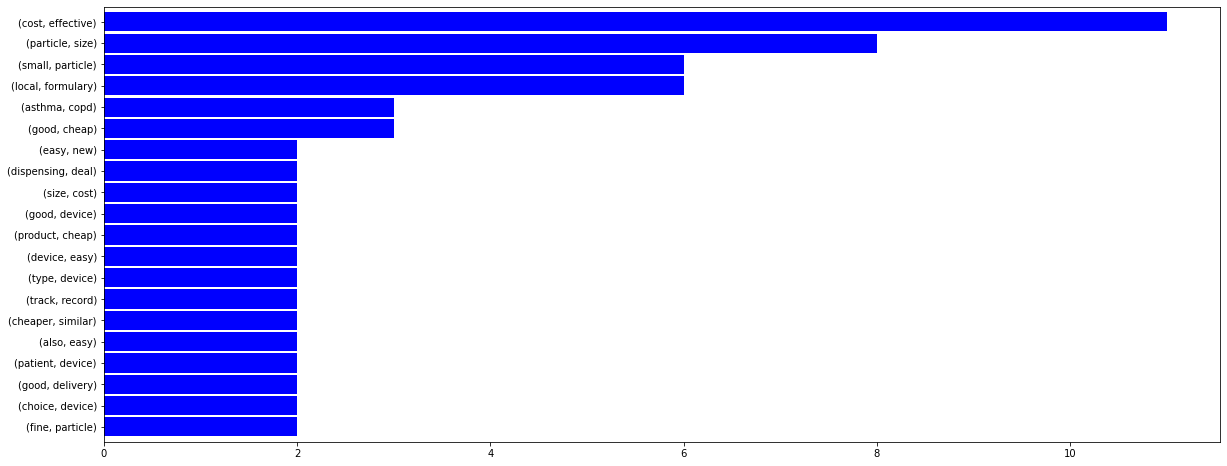

In [12]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(20, 8))

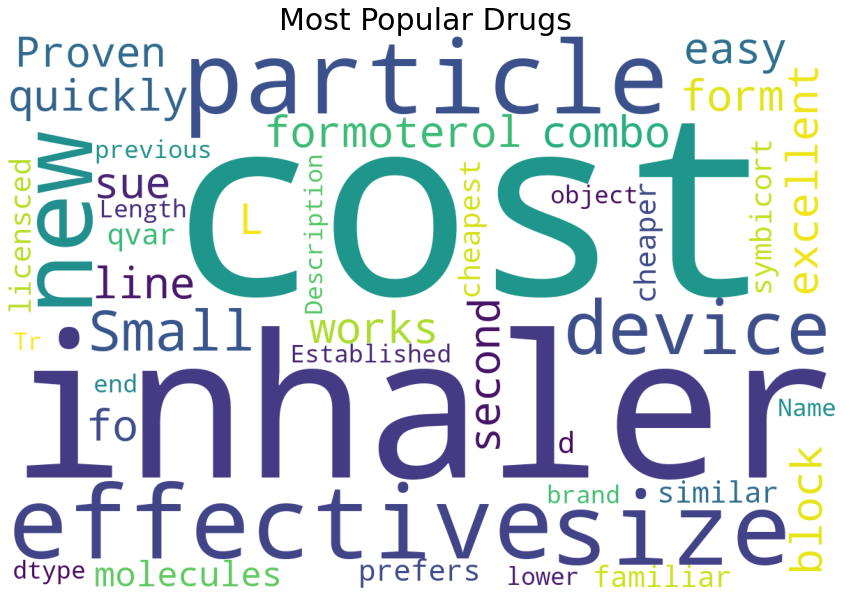

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(str(df['Description']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [14]:
from textblob import TextBlob
df['polarity'] = df["Description"].astype(str).apply(lambda x: TextBlob(x).polarity)
df['subjective'] = df["Description"].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [15]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['1st','laba','nil','mdi','ics_laba','symbicort','3','use','spacer','step','well','u','ic','beclometasone','seretide','formoterol','ccg','like','first','chesni','line']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df["Description"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [17]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)
df_ngram.to_csv(r'C:\Users\computer\Downloads\Fostair-BigramSentiment.csv')
print(df_ngram.head(20))

    frequency         bigram/trigram  polarity  subjective
0          10         cost effective  0.600000    0.800000
1           7          particle size  0.000000    0.000000
2           6         small particle -0.250000    0.400000
3           6        local formulary  0.000000    0.000000
4           5    small particle size -0.250000    0.400000
5           3       effective choice  0.600000    0.800000
6           3            asthma copd  0.000000    0.000000
7           2            type device  0.000000    0.000000
8           2           track record  0.000000    0.000000
9           2  recommended formulary  0.000000    0.000000
10          2          option device  0.000000    0.000000
11          2             lower cost  0.000000    0.000000
12          2            good device  0.700000    0.600000
13          2   good delivery system  0.700000    0.600000
14          2          good delivery  0.700000    0.600000
15          2       good combination  0.700000    0.6000

In [18]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\computer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
import numpy as np

df = pd.read_csv(r"C:\Users\computer\Downloads\Fostair.csv")
df.head()

,Unnamed: 0,Respondent_Serial,Brand,Description
0,0,10,Fostair,Small particle size .
1,3,11,Fostair,""" cost effective . formoterol is excellent L..."
2,8,14,Fostair,""" Inhaler particle sizes . cost . devices ""..."
3,15,16,Fostair,works quickly easy to sue inhaler . form...
4,22,19,Fostair,"new combo on the block , second line , not fo..."


In [20]:
df['scores'] = df['Description'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
df.head()

,Unnamed: 0,Respondent_Serial,Brand,Description,scores,compound,comp_score
0,0,10,Fostair,Small particle size .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,3,11,Fostair,""" cost effective . formoterol is excellent L...","{'neg': 0.0, 'neu': 0.398, 'pos': 0.602, 'comp...",0.9274,pos
2,8,14,Fostair,""" Inhaler particle sizes . cost . devices ""...","{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.8807,pos
3,15,16,Fostair,works quickly easy to sue inhaler . form...,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.4404,pos
4,22,19,Fostair,"new combo on the block , second line , not fo...","{'neg': 0.104, 'neu': 0.821, 'pos': 0.075, 'co...",-0.2023,neg


In [21]:
df.to_csv(r'C:\Users\computer\Downloads\FostairSentiment.csv')

In [22]:
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# import numpy for matrix operation
import numpy as np

# import LDA from sklearn
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
nlp = spacy.load('en_core_web_sm')

In [24]:
df = pd.read_csv(r"C:\Users\computer\Downloads\Fostair.csv")

In [25]:
stoplist = stopwords.words('english') + ['1st','laba','nil','mdi','ics_laba','symbicort','3','use','spacer','step','well','u','ic','beclometasone','seretide','formoterol','ccg','like','first','chesni','line']
stop = set(stoplist)

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())  
    return normalized

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in df['Description']]  

In [26]:
# Converting text into numerical representation
tf_idf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)

# Converting text into numerical representation
cv_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
# Array from TF-IDF Vectorizer 
tf_idf_arr = tf_idf_vectorizer.fit_transform(clean_corpus)

# Array from Count Vectorizer 
cv_arr = cv_vectorizer.fit_transform(clean_corpus)
vocab_tf_idf = tf_idf_vectorizer.get_feature_names()
vocab_cv = cv_vectorizer.get_feature_names()

In [27]:
lda_model = LatentDirichletAllocation(n_components = 6, max_iter = 20, random_state = 20)

# fit transform on model on our count_vectorizer : running this will return our topics 
X_topics = lda_model.fit_transform(tf_idf_arr)

# .components_ gives us our topic distribution 
topic_words = lda_model.components_

In [28]:
n_top_words = 5

for i, topic_dist in enumerate(topic_words):
    
    # np.argsort to sorting an array or a list or the matrix acc to their values
    sorted_topic_dist = np.argsort(topic_dist)
    
    # Next, to view the actual words present in those indexes we can make the use of the vocab created earlier
    topic_words = np.array(vocab_tf_idf)[sorted_topic_dist]
    
    # so using the sorted_topic_indexes we ar extracting the words from the vocabulary
    # obtaining topics + words
    # this topic_words variable contains the Topics  as well as the respective words present in those Topics
    topic_words = topic_words[:-n_top_words:-1]
    print ("Topic", str(i+1), topic_words)

Topic 1 ['similar' 'good' 'effective' 'available']
Topic 2 ['device' 'local' 'cost' 'practice']
Topic 3 ['cheaper' 'small' 'size' 'particle']
Topic 4 ['reliable' 'excellent' 'cost' 'effcetive']
Topic 5 ['good' 'cost' 'particle' 'cheap']
Topic 6 ['effective' 'choice' 'patient' 'easy']
